In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os
from matplotlib.image import imread
import splitfolders
import pathlib as pb

In [4]:
location=r'C:\Users\sandy\PYTHON\New data sets\Rice_MSC_Dataset\Rice_Image_Dataset'

In [5]:
os.listdir(location)

['Arborio',
 'Basmati',
 'Ipsala',
 'Jasmine',
 'Karacadag',
 'Rice_Citation_Request.txt']

In [6]:
arborio_img= location + '\\Arborio\\'
basmati_img= location + '\\Basmati\\'
ipsala_img=location + '\\Ipsala\\'
jasmine_img=location + '\\Jasmine\\'
karacadag_img=location + '\\Karacadag\\'

In [7]:
img1=basmati_img + str(os.listdir(basmati_img)[1])

In [198]:
img1

'C:\\Users\\sandy\\PYTHON\\New data sets\\Rice_MSC_Dataset\\Rice_Image_Dataset\\Basmati\\basmati (10).jpg'

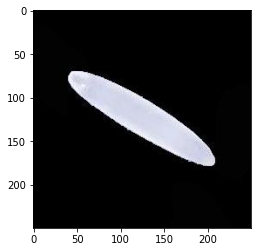

In [8]:
plt.imshow(plt.imread(img1))

In [9]:
im=plt.imread(img1)

In [10]:
im.shape

(250, 250, 3)

In [11]:
### spilliting the data

In [12]:
pb.Path(location)

WindowsPath('C:/Users/sandy/PYTHON/New data sets/Rice_MSC_Dataset/Rice_Image_Dataset')

In [13]:
location

'C:\\Users\\sandy\\PYTHON\\New data sets\\Rice_MSC_Dataset\\Rice_Image_Dataset'

In [14]:
splitfolders.ratio(location,output='img',seed=123,ratio=(0.7,0.15,0.15))

Copying files: 75000 files [06:18, 198.13 files/s]


In [16]:
#[fn for fn in os.listdir(f'{location}/Arborio') if fn.endswith('.jpg')]

In [17]:
arborio=os.listdir(arborio_img)
bastmati=os.listdir(basmati_img)
ipsala=os.listdir(ipsala_img)
jasmine=os.listdir(jasmine_img)
karacadag=os.listdir(karacadag_img)
rice=[arborio, bastmati, ipsala, jasmine, karacadag]

rice_classes=[]
for i in os.listdir('img/train'):
    rice_classes+=[i]
rice_classes.sort()

In [18]:
#data exploration

In [19]:
print(f'Total image: {rice_classes[1],len(rice[1])}')

Total image: ('Basmati', 15000)


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.10,
                              height_shift_range=0.1,
                              rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode="nearest"
                              )


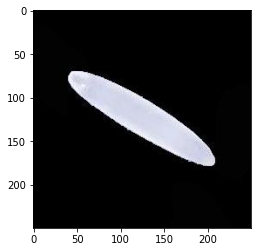

In [22]:
plt.imshow(plt.imread(img1))

In [23]:
image_gen.random_transform(plt.imread(img1)).max()

255

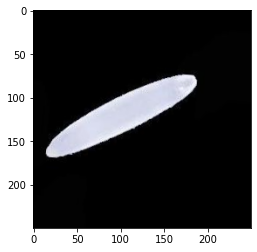

In [24]:
plt.imshow(image_gen.random_transform(plt.imread(img1)))

In [25]:
batch_size = 16
img_height, img_width = 175, 175
input_shape = (img_height, img_width, 3)

In [26]:
train_data=image_gen.flow_from_directory('img/train',target_size=(img_height,img_width),subset="training", batch_size=batch_size)

Found 52500 images belonging to 5 classes.


In [27]:
test_data=image_gen.flow_from_directory('img/test',target_size=(img_height,img_width), batch_size=batch_size,shuffle=False)

Found 11250 images belonging to 5 classes.


In [28]:
val_data=image_gen.flow_from_directory('img/val',target_size=(img_height,img_width), batch_size=batch_size,shuffle=False)

Found 11250 images belonging to 5 classes.


In [29]:
#### creatiing a model


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation

In [31]:
model= Sequential()

#layer 1
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape= input_shape ))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", input_shape= input_shape ))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", input_shape= input_shape ))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(5,activation='softmax'))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [32]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 173, 173, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 86, 86, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 84, 84, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 40, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 25600)             0

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop= EarlyStopping(monitor='val_loss',patience=4)

In [35]:
result=model.fit_generator(train_data,epochs=30,callbacks=[early_stop], validation_data=(val_data))

Epoch 1/30
3282/3282 [==============================] - 1497s 456ms/step - loss: 0.4193 - acc: 0.8311 - val_loss: 0.0989 - val_acc: 0.9698
Epoch 2/30
3282/3282 [==============================] - 1134s 346ms/step - loss: 0.1328 - acc: 0.9559 - val_loss: 0.0402 - val_acc: 0.9890
Epoch 3/30
3282/3282 [==============================] - 965s 294ms/step - loss: 0.0936 - acc: 0.9700 - val_loss: 0.0349 - val_acc: 0.9904
Epoch 4/30
3282/3282 [==============================] - 971s 296ms/step - loss: 0.0785 - acc: 0.9754 - val_loss: 0.0370 - val_acc: 0.9877
Epoch 5/30
3282/3282 [==============================] - 922s 281ms/step - loss: 0.0697 - acc: 0.9779 - val_loss: 0.0286 - val_acc: 0.9914
Epoch 6/30
3282/3282 [==============================] - 903s 275ms/step - loss: 0.0667 - acc: 0.9794 - val_loss: 0.0400 - val_acc: 0.9872
Epoch 7/30
3282/3282 [==============================] - 912s 278ms/step - loss: 0.0618 - acc: 0.9808 - val_loss: 0.0355 - val_acc: 0.9906
Epoch 8/30
3282/3282 [==========

In [37]:
loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

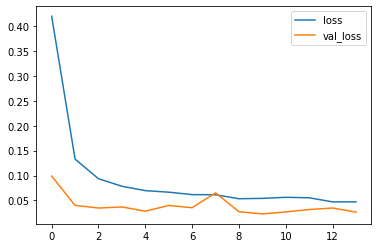

In [40]:
loss[['loss','val_loss']].plot()

<AxesSubplot:>

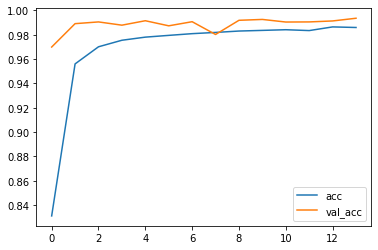

In [42]:
loss[["acc",'val_acc']].plot()

In [173]:
from sklearn.metrics import f1_score,mean_squared_error,recall_score,precision_score,classification_report,confusion_matrix

In [44]:
model.evaluate_generator(test_data)

[0.024546079709112725, 0.9925333]

In [216]:
prediction=model.predict_generator(test_data)

In [217]:
test_data.class_indices

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [218]:
test_data.classes

array([0, 0, 0, ..., 4, 4, 4])

In [219]:
pred_classes=[]

for i in range (len(prediction)):
    result=np.argmax(np.round(prediction[i]))
    pred_classes.append(result)

In [220]:
report=(classification_report(test_data.classes,pred_classes,output_dict=True))

In [221]:
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
0,0.984479,0.986667,0.985572,2250.000000
1,0.999106,0.993333,0.996211,2250.000000
2,0.999112,0.999556,0.999333,2250.000000
3,0.981603,0.996000,0.988749,2250.000000
4,0.997752,0.986222,0.991954,2250.000000
accuracy,0.992356,0.992356,0.992356,0.992356
macro avg,0.992410,0.992356,0.992364,11250.000000
weighted avg,0.992410,0.992356,0.992364,11250.000000


In [222]:
print(mean_squared_error(test_data.classes,pred_classes))

0.07715555555555556


In [223]:
print(confusion_matrix(test_data.classes,pred_classes))

[[2220    0    0   25    5]
 [   1 2235    0   14    0]
 [   1    0 2249    0    0]
 [   6    2    1 2241    0]
 [  27    0    1    3 2219]]


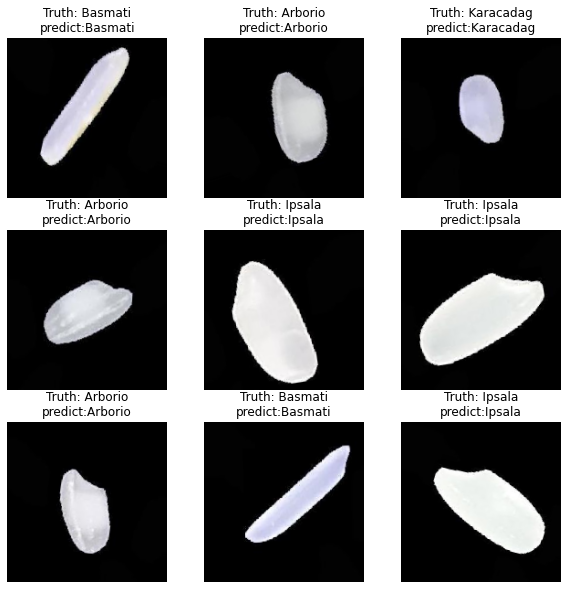

In [261]:
import tensorflow as tf
plt.figure(figsize=(10, 10))
x, label= train_data.next()
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x[i])
    reslt = np.where(label[i]==1)
    predict = model.predict_classes(np.expand_dims(x[i], 0))
    plt.title(f'Truth: {rice_classes[reslt[0][0]]}\npredict:{rice_classes[predict[0]]}' )
    plt.axis(False)